# MU4MA077, Base d'analyse de donnée, 2024-2025
# Analyse descriptive en Python

<div style="text-align: right"> 
Sorbonne Université, Master 1
</div>

<div style="text-align: right"> 
Merci à Maxime Sangnier, et aux autres collègues dont j'ai pu m'inspirer pour construire ce TP
</div>


# Table of contents
1. [JupyterLab en un éclair](#part1)
    - [Raccourcis clavier](#part1sec1)
    - [Obtenir de l'aide](#part1sec2)
2. [Les bases du langage Python](#part2)
    - [Nombres](#part2sec1)
    - [Listes](#part2sec2)
    - [Chaînes de caractères](#part2sec3)
    - [Alternatives](#part2sec4)
    - [Itérations](#part2sec5)
    - [Boucle](#part2sec6)
    - [Fonction](#part2sec7)
3. [Calcul scientifique](#part3)
    - [Vecteurs et matrices](#part3sec1)
    - [Fonctions mathématiques usuelles](#part3sec2)
    - [Lois de probabilités](#part3sec3)
4. [Visualisation](#part4)
    - [Afficher une courbe](#part4sec1)
    - [Embellissement](#part4sec2)
    - [Autres affichages](#part4sec3)
5. [Introduction aux DataFrames avec Pandas](#part5)
    - [Création et manipulation d'une DataFrame](#part5sec1)
    - [Chargement des données](#part5sec2)
6. [Quelques exercices](#part6)
    - [Exercice 1](#part6sec1)
    - [Exercice 2](#part6sec2)
    - [Exercice 3](#part6sec3)
    - [Exercice 4](#part6sec4)


In [2]:
import numpy as np  # Vecteurs and matrices
import pandas as pd
from scipy import stats  # Distributions de probabilité 
import matplotlib.pyplot as plt  # Plots

# Pour rendre les plots plus jolie
import matplotlib as mpl
try:
    mpl.style.use('seaborn-v0_8')
except:
    mpl.style.use('seaborn')
mpl.rcParams['image.cmap'] = 'plasma'
nice_hist = dict(bins='auto', density=True, ec='w')

# JupyterLab en un éclair <a id="part1"></a>
## Raccourcis clavier <a id="part1sec1"></a>
### Sur les cellules

- ENTER : passer en mode édition de la cellule.
- B : ajouter une cellule sous la cellule actuelle.
- A : ajouter une cellule au dessus de la cellule actuelle.

### Lors de l'édition d'une cellule

- ESC : sortir du mode édition de la cellule.
- CTRL+ENTER : exécuter le contenu de la cellule.
- SHIFT+ENTER : exécuter le contenu de la cellule et passer à la suivante.
- ALT+ENTER : exécuter le contenu de la cellule et ajouter une nouvelle cellule dessous.
- TAB : après avoir écrit le début d'une commande (instruction, variable, fonction…), la touche TAB permet de compléter automatiquement la fin.

## Obtenir de l'aide <a id="part1sec2"></a>
Python bénéficie d'une aide extrêmement bien documentée, accessible par exemple grâce à `?`:

Cette même documentation est accessible « en ligne ».

# Les bases du langage Python <a id="part2"></a>
## Nombres <a id="part2sec1"></a>
### Nombres entiers, à virgule et complexes

In [2]:
a = 1  # Entier
b = 1.  # Flottant
c = 1.+2.j  # Complexe

print('a :', a, type(a))
print('b :', b, type(b))
print('c :', c, type(c))

a : 1 <class 'int'>
b : 1.0 <class 'float'>
c : (1+2j) <class 'complex'>


In [3]:
print(c.real, c.imag)

1.0 2.0


In [4]:
print?

Signature: print(*args, sep=' ', end='\n', file=None, flush=False)
Docstring:
Prints the values to a stream, or to sys.stdout by default.

sep
  string inserted between values, default a space.
end
  string appended after the last value, default a newline.
file
  a file-like object (stream); defaults to the current sys.stdout.
flush
  whether to forcibly flush the stream.
Type:      builtin_function_or_method

### Opérations

In [5]:
print(a * 2)  # Produit
print(a**2)  # Puissance
print(a / 2)  # Division
print(a // 2)  # Division entière

2
1
0.5
0


### Booléens

In [6]:
test = True
print('test :', test, type(test))

test : True <class 'bool'>


In [7]:
print(test and a == 1)
print(test or a == 2)
print(a != 1)
print(test and not a == 1)

True
True
False
False


Un Booléen peut être facilement converti en nombre avec la convention suivante : `True = 1`, `False = 0`.

In [8]:
print(int(test))  # Cast Boolean to int
print(test+1, test-1, test*3.2)

1
2 0 3.2


## Listes <a id="part2sec2"></a>
Une liste peut être vue comme l'équivalent d'une suite : c'est une collection ordonnée d'objets (pouvant parfaitement être de types différents) qui peut être agrandie à souhait.

In [9]:
l = [1, 3, 5, 7, "odd numbers"]
print(l)

[1, 3, 5, 7, 'odd numbers']


In [10]:
print("Taille de la liste :", len(l))

Taille de la liste : 5


#### Indiçage d'une liste
<b style="color:red">Attention :</b> L'indiçage d'une liste commence à 0 en Python.

In [11]:
print("First item: ", l[0])  # Premier item
print("Last item: ", l[-1])  # Dernier item

First item:  1
Last item:  odd numbers


Afin d'extraire une sous-liste, il est possible d'utiliser la syntaxe : `l[début:fin:pas]`.
Si certaines de ces informations sont omises, elles sont alors automatiquement interprétées avec les valeurs par défaut : `début = 0`, `fin = len(l)`, `pas=1`.

<b style="color:red">Attention :</b> L'élement indicé par `fin` est toujours exclu.

Voici quelques cas particuliers :

In [12]:
print("Élements indicés de 1 à 3 :", l[1:4])
print("Trois premiers éléments :", l[:3])
print("Élements indicés de 3 jusqu'à la fin :", l[3:])
print("Sous-liste constituée d'un élément sur deux :", l[::2])

Élements indicés de 1 à 3 : [3, 5, 7]
Trois premiers éléments : [1, 3, 5]
Élements indicés de 3 jusqu'à la fin : [7, 'odd numbers']
Sous-liste constituée d'un élément sur deux : [1, 5, 'odd numbers']


#### Concaténation, ajout et suppression d'éléments

In [13]:
l.extend([9, 11])  # Concatenation
print(l)

[1, 3, 5, 7, 'odd numbers', 9, 11]


In [14]:
l.append(13)  # Ajouter un item à la fin de la liste
print(l)

[1, 3, 5, 7, 'odd numbers', 9, 11, 13]


In [15]:
del l[0]  # Supprimer le premier item
print(l)

[3, 5, 7, 'odd numbers', 9, 11, 13]


#### Présence d'un élément dans une liste

In [16]:
print("2 is in l: ", 2 in l)
print("3 is in l: ", 3 in l)

2 is in l:  False
3 is in l:  True


## Chaînes de caractères <a id="part2sec3"></a>
Les chaînes de caractères se définissent simplement avec des guillemets simples `'` ou doubles `"`.
Le plus intéressant pour nous est la possibilité d'y insérer le contenu de variables au format souhaité.

In [17]:
p = 0.049
print(f"La p-valeur du test est {p}")  # Format par defaut
print(f"La p-valeur du test est {p:0.2e}")  # Format scientifique

La p-valeur du test est 0.049
La p-valeur du test est 4.90e-02


In [18]:
t = 1.
print(f"i={int(t)}")  # Format entier

i=1


Si une chaîne de caractères contient des formules LaTeX, il convient de doubler les barres obliques inversées `\` et les accolades `{}` **dans les expressions LaTeX uniquement**. On utilisera donc `\\` et `{{}}`, le mécanisme `{}` ne servira que pour insérer la valeur d'une variable. Cela sera principalement utile pour les légendes de graphes (cf. infra), la routine `print` n'interprétant pas les expression LaTeX.

Exemple d'une loi normale centrée mais non-réduite : $\mathcal{N}(0, 2.5)$, et d'une loi du chi-deux : $\chi^2_{10}$.


Text(0, 0, "Exemple d'une loi normale centrée mais non-réduite : $\\mathcal{N}(0, 2.5)$, et d'une loi du chi-deux : $\\chi^2_{10}$.")

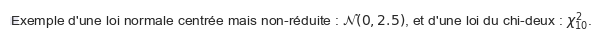

In [19]:
sigma2 = 2.5
ddl = 10
print(f"Exemple d'une loi normale centrée mais non-réduite : $\\mathcal{{N}}(0, {sigma2})$, et d'une loi du chi-deux : $\\chi^2_{{{ddl}}}$.")  # LaTeX support

# Exemple de résultat
plt.figure(figsize=(0.1, 0.1))
plt.xticks([])
plt.yticks([])
plt.text(0, 0, f"Exemple d'une loi normale centrée mais non-réduite : $\\mathcal{{N}}(0, {sigma2})$, et d'une loi du chi-deux : $\\chi^2_{{{ddl}}}$.")

## Alternatives <a id="part2sec4"></a>
En Python, les blocs de codes sont définis par l'indentation.
Ainsi, les instructions à exécuter se trouvent directement sous `if`, `elif` ou `else` (en fonction de l'issue de l'alternative) et **indentées**.

Les comparaisons sont effectuées avec les opérateurs `==`, `!=`, `is`, `in`, `not`, `<`, `<=`, …

In [20]:
h = 3.14  # Cyble
i = 3  # essaie

print("La valeur inconnue est", end=" ")
if h < i:
    print("plus petite que %d." % i)
elif h > i:
    print("plus grande que %d." % i)
else:
    print("exactly %d." % i)

La valeur inconnue est plus grande que 3.


## Itérations <a id="part2sec5"></a>
Une itération (communément appelée *boucle for*) permet de répéter une suite d'instructions sur plusieurs valeurs d'une variable itérée.

L'exemple suivant itère sur l'intervalle $\{0, 1, \dots, 9\}$.

In [21]:
for it in range(10):
    print(it, end=" ")

0 1 2 3 4 5 6 7 8 9 

L'une des particularités du langage Python est de permettre la construction d'itérations sur plusieurs types d'objets : intervalles, listes, dictionnaires…

### Intervalles
Un intervalle peut être construit de manière similaire à l'extraction d'une sous-liste : `range(fin)` or `range(début, fin, pas)` (encore une fois avec les valeurs par défaut `début = 0` et `pas = 1` en cas d'omission).

In [22]:
for it in range(5):
    print(it, end=" ")

0 1 2 3 4 

In [23]:
for it in range(10, 20, 3):
    print(it, end=" ")

10 13 16 19 

### Listes

In [24]:
l = [0.2, 4, 0.8, 7, "end"]
for elem in l:
    print(elem)

0.2
4
0.8
7
end


### Deux commandes utiles : `enumerate` et `zip`
Afin d'enrichir les possibilités d'itération, Python dispose des commandes suivantes :
- `enumerate(l)`, qui crée simultanément deux itérateurs `i` et `val`, l'un parcourant les indices, l'autre les valeurs de `l` ;
- `zip(l1, l2)`, qui crée simultanément deux itérateurs `x` et `y`, l'un parcourant `l1`, l'autre parcourant `l2`.

In [25]:
l = [0.2, 4, 0.8, 7, "end"]
for i, val in enumerate(l):
    print(val, "(item %d)" % i)

0.2 (item 0)
4 (item 1)
0.8 (item 2)
7 (item 3)
end (item 4)


In [26]:
for x, y in zip([1, 0, -1, 0], [0, 1, 0, -1]):
    print("x =", x, ", y =", y)

x = 1 , y = 0
x = 0 , y = 1
x = -1 , y = 0
x = 0 , y = -1


### Création de listes par filtrage
Parfois appelée *compréhension de listes*, la création de listes par filtrage est une manière concise de créer une liste.

In [27]:
l = [a**2 for a in range(10)]
print(l)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Cette compréhension est strictement équivalente à :

In [28]:
l = []
for a in range(10):
    l.append(a**2)
print(l)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


Un autre exemple :

In [29]:
l = [a**2 for a in range(10) if a%2 == 0]
print(l)

[0, 4, 16, 36, 64]


## Boucle <a id="part2sec6"></a>
Une boucle (communément appelée *boucle while*) permet de répéter une suite d'instructions tant qu'une condition est vérifiée.

L'exemple suivant permet de déterminer la partie entière `y` d'un nombre `x` positif.

In [30]:
x = 12.3

y = 0
while y <= x:
    y = y + 1
y = y - 1
print("La partie entière de %.1f est %d" % (x, y))

La partie entière de 12.3 est 12


## Fonction <a id="part2sec7"></a>
Une fonction est définie avec le mot clef `def`.
Elle peut avoir des arguments ou non (avec ou sans valeurs par défaut) et retourner un résultat ou non.

L'exemple suivant retourne la liste des carrés des nombres passés en argument.

In [31]:
def square(l):
    L = []
    for elem in l:
        L.append(elem**2)
    return L

print(square([3, 4, 6]))

[9, 16, 36]


### Méthodes
Python est un langage de programmation orientée objet.
Ainsi, tout objet (nombre, liste…) possède un ensemble de fonctions capables de le modifier.
Ces fonctions sont appelées méthodes.

C'est par exemple le cas d'une liste `l` dont deux méthodes déjà vues sont : `l.append()` et `l.extend()`.
Un autre exemple :

In [32]:
l = [1, 3, 5]
l.reverse()  # l est inversé (donc modifié)
print(l)


[5, 3, 1]


Pour connaître les méthodes associées à un objet `l`, écrire :
    
    l.
    
puis taper TAB.
Le raccourci SHIFT+TAB permet ensuite d'obtenir la documentation de la méthode.

# Calcul scientifique <a id="part3"></a>
## Vecteurs et matrices <a id="part3sec1"></a>
### Création
Les vecteurs et matrices sont des tableaux créés avec le module `numpy`, abrégé ici `np`.

In [33]:
# A matrice
A = np.array([[18., 17., 16.],
              [14., 19., 18.]])
print(A)

# A vecteur
b = np.array([5., 1., 3.])
print(b)

# Produit de A avec b
print(A @ b)

[[18. 17. 16.]
 [14. 19. 18.]]
[5. 1. 3.]
[155. 143.]


In [34]:
print("Dimensions de A :", A.shape)  # Le resultat est un tuple 

Dimensions de A : (2, 3)


In [35]:
print("Nombre total d'éléments dans A :", A.size)

Nombre total d'éléments dans A : 6


### Vecteurs et matrices usuels

In [36]:
np.arange(5, step=0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [37]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [38]:
np.ones((2, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [39]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [40]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [41]:
np.linspace(0, 1, num=6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

### Indiçage et itération
Les vecteurs et matrices sont une généralisation des listes simples et des listes de listes.
À ce titre, ils peuvent être indicés ou utilisés pour construire une itération au même titre que les listes.

<b style="color:red">Attention :</b> L'indiçage d'un vecteur ou d'une matrice permet d'extraire les lignes de haut en bas.

In [42]:
a = np.arange(4)
print(a)
print(a[1:3])

[0 1 2 3]
[1 2]


In [43]:
m = np.diag([1, 2, 3])
print(m)
print(m[0])

[[1 0 0]
 [0 2 0]
 [0 0 3]]
[1 0 0]


Il est aussi possible d'extraire un unique élément :

In [44]:
print(m[1, 1])

2


<b style="color:red">Attention :</b> Pour copier un vecteur ou une matrice, il faut utiliser (au même titre que pour une liste) la méthode `copy`.

In [45]:
p = m.copy()
m[0, 1] = 1

print(m)
print(p)

[[1 1 0]
 [0 2 0]
 [0 0 3]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [46]:
for x in np.linspace(0, 1, num=10):
    print(x)

0.0
0.1111111111111111
0.2222222222222222
0.3333333333333333
0.4444444444444444
0.5555555555555556
0.6666666666666666
0.7777777777777777
0.8888888888888888
1.0


In [47]:
for row in m:
    print(row, end="\n----------\n")

[1 1 0]
----------
[0 2 0]
----------
[0 0 3]
----------


### Méthodes mathématiques
Les vecteurs et matrices disposent de méthodes permettant des traitements mathématiques usuels.

In [48]:
print(a)
print("Somme des éléments :", a.sum())
print("Produit des éléments :", a.prod())

[0 1 2 3]
Somme des éléments : 6
Produit des éléments : 0


In [49]:
a.cumsum()

array([0, 1, 3, 6])

In [50]:
a.mean(), a.std()

(1.5, 1.118033988749895)

In [51]:
a.min(), a.max()

(0, 3)

In [52]:
a.argmin(), a.argmax()

(0, 3)

In [53]:
c = np.array([4, 3, 6, 5, 9])
c.sort()  # Réarrangement 
print(c)

[3 4 5 6 9]


Pour les matrices, il est possible de spécifier l'axe suivant lequel l'opération doit être effectuée : par exemple, `sum(axis=0)` somme les lignes   et `sum(axis=1)` somme les colonnes.

In [54]:
print(m)
print(m.sum(axis=0))  # Somme de colonne

[[1 1 0]
 [0 2 0]
 [0 0 3]]
[2 2 3]


## Fonctions mathématiques usuelles <a id="part3sec2"></a>
Toutes les fonctions mathématiques usuelles existent dans le module `np` et peuvent s'appliquer à un vecteur ou à une matrice élément par élément.

In [55]:
print("Racine de 10 :", np.sqrt(10))

Racine de 10 : 3.1622776601683795


In [56]:
x = np.linspace(0, 2*np.pi, num=10)
print(np.sin(x))

[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]


Les fonctions mathématiques spécifiques à l'algèbre linéaire existent dans le sous-module `np.linalg`.

In [57]:
a = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
print("Vecteur :", a)
print("Norme :", np.linalg.norm(a))

Vecteur : [ 0.70710678 -0.70710678]
Norme : 0.9999999999999999


In [58]:
print("Matrice :")
print(m)
print("Inverse :")
print(np.linalg.inv(m))

Matrice :
[[1 1 0]
 [0 2 0]
 [0 0 3]]
Inverse :
[[ 1.         -0.5         0.        ]
 [ 0.          0.5         0.        ]
 [ 0.          0.          0.33333333]]


Comme dans beaucoup de langages de calcul scientifique, les quantiles empiriques d'un échantillon ne sont pas nécessairement une statistique d'ordre :

In [59]:
a = np.arange(4)
print("Échantillon :", a)
print("Médiane de Numpy :", np.median(a))

Échantillon : [0 1 2 3]
Médiane de Numpy : 1.5


Pour faire en sorte que, pour tout $p \in ]0, 1]$, le $p$-quantile empirique de l'échantillon $(X_1, \dots, X_n)$ soit $X_{(\lceil np \rceil)}$, il nous faut utiliser l'expression `np.quantile(x, p, interpolation='lower')` ou `np.percentile(x, 100*p, interpolation='lower')` :

In [60]:
print("Échantillon :", a)
print("Médiane :", np.percentile(a, 50, interpolation='lower'))

Échantillon : [0 1 2 3]
Médiane : 1


## Lois de probabilités <a id="part3sec3"></a>
Le module `stats` permet de créer des objets représentant les lois de probabilité usuelles et d'en calculer divers attributs (espérance, variance, quantiles…).
Attention toutefois, les lois sont paramétrées « à l'anglaise ».
Autrement dit, elles possèdent au moins un paramètre `loc`, dit de translation, et un paramètre `scale`, dit de dilatation ou d'échelle (les autres paramètres sont appelés *paramètres de forme*). Cela signifie que si $X$ suit la loi avec les paramètres par défaut, alors la variable $Y=$ `scale` $X$+`loc`suit la loi dilatée translatée.
Les paramètres « à la française » peuveut se cacher dedans.
L'exemple de la loi normale en témoigne.

In [61]:
norm = stats.norm(loc=3, scale=np.sqrt(2))  # Distribution Normale avec moyenne 3 et variance 2
print("Espérance :", norm.mean())
print("Variance :", norm.var())

Espérance : 3.0
Variance : 2.0000000000000004


Ainsi que celui de la loi exponentielle $\mathcal E(\lambda)$, pour laquelle le paramètre de dilatation est $1/\lambda$ :

In [62]:
exp = stats.expon(scale=1/2)  # Distribution exponentielle avec le paramètre lambda=

print("Espérance :", exp.mean())
print("Variance :", exp.var())

Espérance : 0.5
Variance : 0.25


Voici quelques exemples d'attributs calculables pour la loi $\mathcal N(3, 2)$ :

In [63]:
print("Support :", norm.support())
print("Médiane :", norm.median())
print("0,975-quantile :", norm.ppf(0.975))
print("Densité en x=0 :", norm.pdf(0))

Support : (-inf, inf)
Médiane : 3.0
0,975-quantile : 5.771807648699356
Densité en x=0 : 0.02973257230590736


Un dernier point important en statistique et pour les méthodes Monte-Carlo est la possibilité d'échantillonner suivant la loi :

In [64]:
x = exp.rvs(size=20)  # Echantillon aléatoire de la distribution exponentielle
print("Échantillon :", x)
print("Moyenne :", x.mean())
print("Espérance :", exp.mean())

Échantillon : [0.04112378 0.39571802 0.33439212 0.07008909 0.12941689 0.34837845
 0.44341342 0.08067269 0.0027717  0.10351293 0.24096967 0.01699759
 0.23634098 1.43903796 0.59760508 0.43065199 0.7588688  0.30196961
 0.70399186 1.40552879]
Moyenne : 0.40407257091799603
Espérance : 0.5


# Visualisation <a id="part4"></a>
## Afficher une courbe <a id="part4sec1"></a>


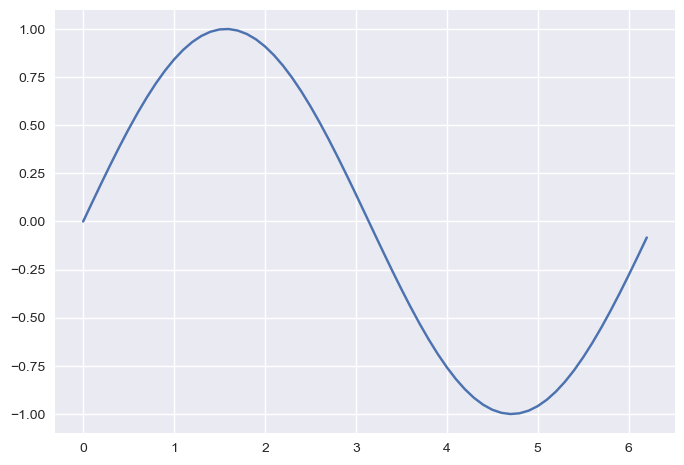

In [65]:
x = np.arange(0, 2*np.pi, step=1e-1)
y1 = np.sin(x)

plt.plot(x, y1);

## Embellissement <a id="part4sec2"></a>
### Étiquettes des axes et titre

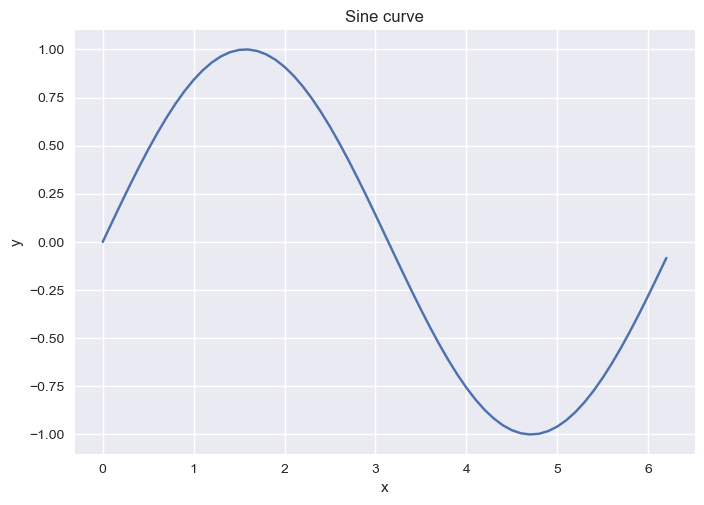

In [66]:
plt.plot(x, y1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine curve");

### Légende

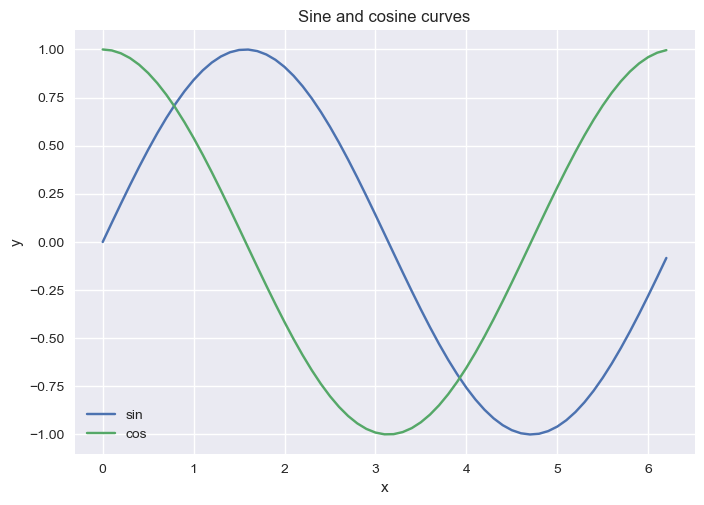

In [67]:
y2 = np.cos(x)

plt.plot(x, y1, label="sin")
plt.plot(x, y2, label="cos")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine and cosine curves")
plt.legend();

### Couleur et format des courbes

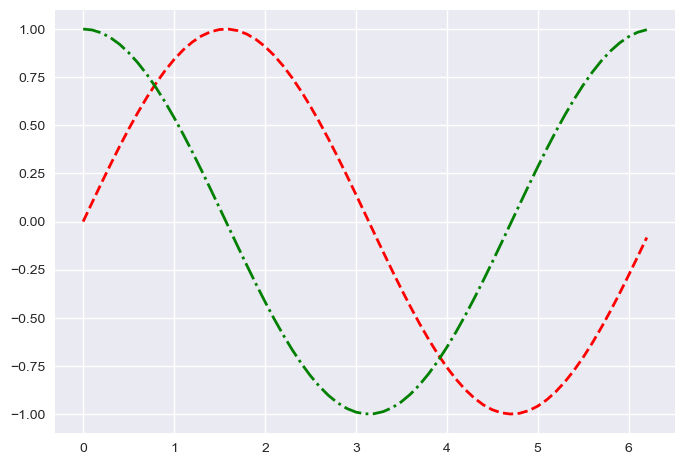

In [68]:
plt.plot(x, y1, 'r--', linewidth=2)
plt.plot(x, y2, 'g-.', linewidth=2);

### Sous-figures

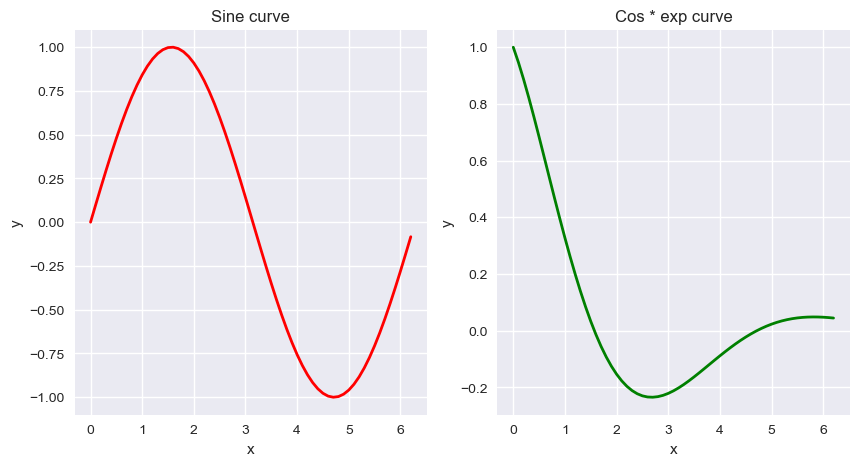

In [69]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, Item 1
plt.plot(x, y1, linewidth=2, color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine curve")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, Item 2
plt.plot(x, y2*np.exp(-x/2), linewidth=2, color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Cos * exp curve");

### Échelle logarithmique

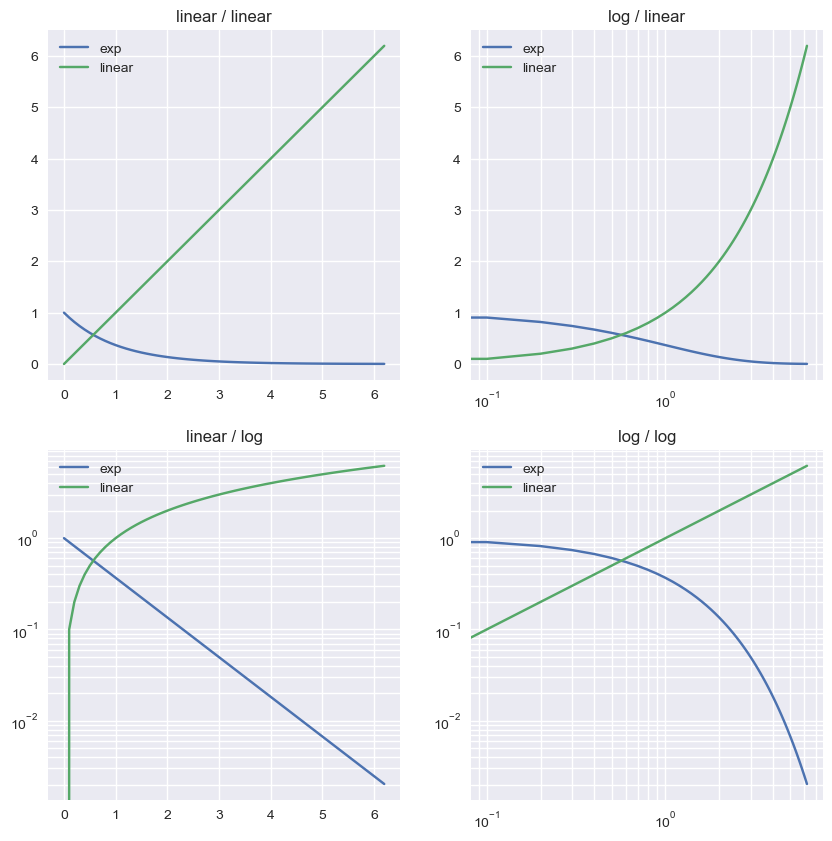

In [70]:
plt.figure(figsize=(10, 10))

for it, (xscale, yscale) in enumerate([("linear", "linear"),
                                      ("log", "linear"),
                                      ("linear", "log"),
                                      ("log", "log")]):
    plt.subplot(2, 2, it+1)
    plt.plot(x, np.exp(-x), label="exp")
    plt.plot(x, x, label="linear")
    plt.grid(True, which="both")
    plt.xscale(xscale)
    plt.yscale(yscale)
    plt.legend()
    plt.title(xscale + ' / ' + yscale)

# Introduction aux DataFrames avec Pandas <a id="part5"></a>

Pandas est une bibliothèque Python très utilisée pour la manipulation de données, en particulier les données tabulaires sous forme de ``DataFrame``. Une ``DataFrame`` est une structure de données bidimensionnelle similaire à une table de base de données ou une feuille Excel où les données sont organisées en lignes et en colonnes. Chaque colonne peut contenir des types de données différents : entiers, flottants, chaînes de caractères, dates, etc. Voici un aperçu des opérations de base pour créer, manipuler et analyser une DataFrame dans Pandas.

### Création et manipulation d'une DataFrame <a id="part5sec1"></a>

Pour commencer, vous pouvez créer une ``DataFrame`` de différentes façons. Par exemple, à partir d'un dictionnaire, d'une liste par exemple.

In [71]:
data = {
    'Nom': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 40, 28],
    'Salaire': [50000, 55000, 60000, 45000, 52000],
    'Sexe': ['F', 'M', 'M', 'M', 'F']
}

df = pd.DataFrame(data)
df.head()

,Nom,Age,Salaire,Sexe
0,Alice,25,50000,F
1,Bob,30,55000,M
2,Charlie,35,60000,M
3,David,40,45000,M
4,Eve,28,52000,F


Une fois la DataFrame créée, vous pouvez accéder à différentes parties des données. Par exemple on peut acceder à une colonne en utilisant son nom. 

In [72]:
print(df['Age'])

0    25
1    30
2    35
3    40
4    28
Name: Age, dtype: int64


On peut églement utilisez ``loc[]`` ou ``iloc[]`` pour accéder par étiquette ou par index. 

In [73]:
# Accéder à la première ligne (par étiquette)
print(df.loc[0])

# Accéder à la première ligne (par index numérique)
print(df.iloc[0])

Nom        Alice
Age           25
Salaire    50000
Sexe           F
Name: 0, dtype: object
Nom        Alice
Age           25
Salaire    50000
Sexe           F
Name: 0, dtype: object


Enfin, on peut uiliser ``iloc[]`` pour accéder à un élément spécifique, ici par exemple, la 2eme ligne et 3eme colonne.

In [74]:
print(df.iloc[1, 2])

55000


Pandas permet également de filtrer les données facilement, par exemple avec des conditions logiques. 

In [75]:
df_filtered = df[df['Age'] > 30]
df_filtered.head()

,Nom,Age,Salaire,Sexe
2,Charlie,35,60000,M
3,David,40,45000,M


Enfin, Pandas permet de réaliser des transformations simples sur les colonnes. On peut notamment ajouter ou enlever des colonnes facilement. 

In [76]:
df['Ancienneté'] = df['Age'] // 5
print(df)

       Nom  Age  Salaire Sexe  Ancienneté
0    Alice   25    50000    F           5
1      Bob   30    55000    M           6
2  Charlie   35    60000    M           7
3    David   40    45000    M           8
4      Eve   28    52000    F           5


In [77]:
df = df.drop('Ancienneté', axis=1)
print(df)

       Nom  Age  Salaire Sexe
0    Alice   25    50000    F
1      Bob   30    55000    M
2  Charlie   35    60000    M
3    David   40    45000    M
4      Eve   28    52000    F


## Chargement des données <a id="part5sec2"></a>

On peut également créer charger des données à partir de différents formats (CSV, TXT, Excel, etc.). On va apprednre ici à manipuler les séparateurs et comprendre comment ils influencent le chargement des données. 

### Chargement des données depuis un fichier CSV

Tout d'abord, commancons par le format CSV (Comma Separated Values) qui est l'un des formats les plus courants pour stocker des données tabulaires. Le chargement de fichiers CSV est simple avec la bibliothèque ``pandas``. 

In [78]:
df_csv = pd.read_csv('data.csv')
df_csv.head()

,ID,Nom,Age,Salaire,Sexe
0,1,Alice,25,50000,F
1,2,Bob,30,55000,M
2,3,Charlie,35,60000,M
3,4,David,42,45000,M
4,5,Eve,28,52000,F


Si le fichier utilise un séparateur différent, il suffit de spécifier ce séparateur dans l'argument **sep**. 

<b style="color:red">À vous de jouer :</b> Ouvrez et visualisez le fichier **data_bis.csv** dans votre explorateur de fichiers. Quel est le séparateur à utiliser pour séparer correctement les valeurs de cette base de données? Une fois que vous avez la réponse, adaptez le code ci-dessus pour charger le ficher **data_bis.csv** avec ``pandas``. 



<b style="color:red">Réponse :</b> 
```

df=pd.read_csv('data_bis.csv',sep=';')

### Chargement des données depuis un fichier TXT

Les fichiers texte peuvent avoir divers formats. Par exemple, les données peuvent être séparées par des espaces, des tabulations, ou des tabulations multiples. Vous trouverez ci-dessous deux exemples.

In [79]:
# Chargement d'un fichier TXT avec des espaces comme séparateurs
df_txt = pd.read_csv('data.txt', sep=' ')
df_txt.head()

,ID,Nom,Age,Salaire,Sexe
0,1,Alice,25,50000,F
1,2,Bob,30,55000,M
2,3,Charlie,35,60000,M
3,4,David,42,45000,M
4,5,Eve,28,52000,F


In [80]:
# Chargement d'un fichier TXT avec des tabulations comme séparateurs
df_tab = pd.read_csv('data_tab.txt', sep='\t')
df_tab.head()

,ID,Nom,Age,Salaire,Sexe
0,1,Alice,25,50000,F
1,2,Bob,30,55000,M
2,3,Charlie,35,60000,M
3,4,David,42,45000,M
4,5,Eve,28,52000,F


### Chargement des données depuis un fichier Excel

Il est également très simple de charger un fichier Excel en utilisant pandas grâce à la fonction read_excel(). Cette fonction permet également de gérer les différents types de feuilles (sheets) dans un fichier Excel.


In [81]:
# Chargement d'un fichier Excel
df_excel = pd.read_excel('data.xlsx')
df_excel

,ID,Nom,Age,Salaire,Sexe
0,1,Alice,25,50000,F
1,2,Bob,30,55000,M
2,3,Charlie,35,60000,M
3,4,David,42,45000,M
4,5,Eve,28,52000,F
5,6,Frank,40,30000,M
6,7,Grace,22,47000,F
7,8,Hannah,28,49000,F
8,9,Ivy,34,56000,F
9,10,Jack,45,60000,M


<b style="color:red">Réponse :</b> 
```
df_sheet1 = pd.read_excel('data.xlsx', sheet_name='Sheet1')
df_sheet2 = pd.read_excel('data.xlsx', sheet_name='Sheet2')
dfs = pd.read_excel('data.xlsx', sheet_name=None)

df_sheet1 = dfs['Sheet1']
df_sheet2 = dfs['Sheet2']


### Gérer les valeurs manquantes

Les problèmes de formatage (types de données) et les valeurs manquantes sont courantes dans de nombreux ensembles de données. Vous pouvez identifier les valeurs manquantes avec ``isnull()`` ou ``isna()``. 

In [82]:
# Retournent le nombre de valeurs manquantes par colonne
print(df_csv.isnull().sum())
print(df_csv.isna().sum())

ID         0
Nom        0
Age        0
Salaire    0
Sexe       0
dtype: int64
ID         0
Nom        0
Age        0
Salaire    0
Sexe       0
dtype: int64


<b style="color:red">À vous de jouer :</b> Chargez le fichier **data_missing.csv** dans une ``DataFrame`` avec le nom **df_missing** et recommencez l'opération. Que pouvons nous dire ?


<b style="color:red">Réponse :</b> 
```

In [7]:
df_missing = pd.read_csv('data_missing.csv')
print(df_missing.isnull().sum())
print("Nous constatons qu'il y a des valeurs manquantes")

ID         0
Nom        0
Age        2
Salaire    1
Sexe       1
dtype: int64
Nous constatons qu'il y a des valeurs manquantes


Si votre jeu de données a des valeurs manquantes, il y a en général deux solution possible: 
- Supprimer les lignes avec des valeurs manquantes
- Remplacer les valeurs manquantes par une valeur choisi de facon plus ou moins intelligente
  
Si vous souhaitez supprimer les lignes contenant des valeurs manquantes, vous pouvez utiliser ``dropna()``. Dans certains cas, vous préférerez peut-être remplir les valeurs manquantes avec une valeur par défaut (par exemple 0), par la moyenne, ou par la médiane d'une colonne. Voici quelques exemples possibles. 

In [8]:
df_no_missing = df_missing.dropna()
df_no_missing.head()

,ID,Nom,Age,Salaire,Sexe
0,1,Alice,25.0,50000.0,F
3,4,David,40.0,45000.0,M


In [9]:
# Remplir les valeurs manquantes d'une colonne spécifique
df_filled = df_missing.fillna(0)
print(df_filled)

# Remplir les valeurs manquantes avec la moyenne de chaque colonne numérique et rajouté une possibilité pour les autres
df_filled_mean = pd.DataFrame()
df_filled_mean[['Age', 'Salaire']] = df_missing.loc[:,['Age', 'Salaire']].fillna(df_missing.loc[:,['Age', 'Salaire']].mean())
df_filled_mean[['Nom', 'Sexe']] = df_missing.loc[:,['Nom', 'Sexe']].fillna('Manquant')
print(df_filled_mean)



   ID      Nom   Age  Salaire Sexe
0   1    Alice  25.0  50000.0    F
1   2      Bob   0.0  55000.0    M
2   3  Charlie  35.0      0.0    0
3   4    David  40.0  45000.0    M
4   5      Eve   0.0  52000.0    F
         Age  Salaire      Nom      Sexe
0  25.000000  50000.0    Alice         F
1  33.333333  55000.0      Bob         M
2  35.000000  50500.0  Charlie  Manquant
3  40.000000  45000.0    David         M
4  33.333333  52000.0      Eve         F


# Quelques exercices <a id="part6"></a>

On va à présent mettre en pratique ces connaissances avec quelques exercices simples. 

## Exercice 1 <a id="part6sec1"></a> 

Dans chacun des cas suivant écrire un programme qui: 
- Demande à l’utilisateur d’entrer une à une les coordonnées de deux points dans le plan puis affiche la distance euclidienne entre ces deux points.
- Demande à l’utilisateur d’entrer son nom puis son prénom et affiche les initiales.
- Demande à l’utilisateur d’entrer une chaîne de caractères puis l’affiche encadrée par deux étoiles.
- Demande à l’utilisateur d’entrer un mot puis affiche un message disant si ce mot a plus de huit lettres ou pas et donne la longueur du mot.
- Demande à l’utilisateur d’entrer une serie de nombres et affiche un message précisant la différence entre le plus grand et le plus petit.

*Hint: pour l'entrée, ou pourra utiliser la fonction `input`*

In [ ]:
#1/A
x1 =input("Rentrer la valeur de x1")
y1 =input("Rentrer la valeur de y1")

x2 =input("Rentrer la valeur de x2")
y2 =input("Rentrer la valeur de yy2")
print(f"la distance euclidienne entre ({math.sqrt((x2 - x1)**2 + (y2 - y1)**2)}")


In [ ]:
#1/ Bsdf

nom = input("Votre nom ?")
prenom = input("Votre prenom ?")
initiales = prenom[0].upper() + nom[0].upper()
print(f"Les initiales : {initiales}")

#1/ C
chaine_cara=input("Rentrez chaine de cara")
print(f"**{chaine_cara}**")

Les initiales : SD
**df**


In [24]:
#1/ D Mot de plus de 8 cara ?
mot = input("votre mot ?")
if len(mot) > 8:
    print(f"Votre mot  à + de 8 lettres, il en a {len(mot)}")
else :
    print(f"Votre mot  à - de 8 lettres, il en a {len(mot)}")
    

Votre mot  à + de 8 lettres, il en a 18


In [27]:
#1/ E
serie = input("Entrez une série de nombres séparés par des espaces")
liste = [int(num) for num in serie.split()]
print(f"Différence entre + grand et + petit = {max(liste)-min(liste)}")

Différence entre + grand et + petit = 5345


## Exercice 2 <a id="part6sec2"></a>

- Ecrire un programme qui résout l'équation $ax^2 + bx + c = 0$. Le programme demande les valeurs de a, b, c à l’utilisateur et affiche le nombre de solutions et leurs valeurs éventuelles.
- Ecrire un programme qui demande à l’utilisateur d’entrer une chaîne de caractères et qui affiche une nouvelle chaîne de caractères composée uniquement des voyelles de la chaîne initiale.
- Ecrire une fonction qui calcule la médiane d’une liste de nombres. L’appliquer à une liste de 10 nombres aléatoires.
- Ecrire une fonction qui détermine le mode d’une liste de nombres. L’appliquer à une liste de 10 nombres aléatoires à valeurs 0 et 1. *Hint: On pourra utiliser la méthode `most.common( )` du package `collection`.*

In [ ]:
#2 A/
import math
a = float(input("Entrez le coefficient a : "))
b = float(input("Entrez le coefficient b : "))
c = float(input("Entrez le coefficient c : "))

# Si a est nul, l'équation devient linéaire ou impossible
if a == 0:
    if b == 0:
        if c == 0:
            print("L'équation a une infinité de solutions.")
        else:
            print("L'équation n'a pas de solution.")
    else:
        solution = -c / b
        print(f"L'équation est linéaire. La solution est : x = {solution}")
else:
    # Calcul du discriminant
    delta = b**2 - 4*a*c

    if delta > 0:
        # Deux solutions réelles
        x1 = (-b - math.sqrt(delta)) / (2*a)
        x2 = (-b + math.sqrt(delta)) / (2*a)
        print(f"L'équation a deux solutions réelles : x1 = {x1} et x2 = {x2}")
    elif delta == 0:
        # Une solution réelle double
        x = -b / (2*a)
        print(f"L'équation a une solution réelle double : x = {x}")
    else:
        # Aucune solution réelle
        print("L'équation n'a pas de solution réelle.")

# Exécution de la fonction
resoudre_equation_quadratique()


In [30]:
#2 B/Ecrire un programme qui demande à l’utilisateur d’entrer une chaîne de caractères et qui affiche une nouvelle chaîne de caractères composée uniquement des voyelles de la chaîne initiale.
chaine_cara = input("Rentrez une de chaine de cara :")
liste_voyelle   =['a','e','i','o','u']
nouvelle_chaine = ''.join([cara for cara in chaine_cara if cara in liste_voyelle])
print(f"La nouvelle chaine : {nouvelle_chaine}")

La nouvelle chaine : auie


In [38]:
#2/ C Ecrire une fonction qui calcule la médiane d’une liste de nombres. L’appliquer à une liste de 10 nombres aléatoires.
def calcul_mediane(liste):
    liste_sort=sorted(liste)
    if len(liste)% 2 == 0:
        mediane = (liste_sort[len(liste)//2-1]+liste_sort[len(liste)//2])/2
    else :
        mediane = liste_sort[len(liste)//2]
    return mediane

liste_random = np.random.randint(0,100,10)
print(liste_random)
print(calcul_mediane(liste_random))   

[98  1 71 97 78 45 37 16 66 85]
68.5


## Exercice 3 <a id="part6sec3"></a>

Nous allons utiliser le module `turtle` qui permet de dessiner simplement à l’aide d’une « tortue » qui se déplace, nous allons faire queques dessins.  Les principales fonctions sont les suivantes :

- `reset( )` : efface l’écran est revient à la situation initiale
- `goto(x,y)` : amener le crayon à un point précis
- `forward(longueur)` et `backward(longueur)` pour avancer ou
reculer d’une longueur en pixels
- `left(angle)` et `right(angle)` pour tourner à gauche ou a droite
d’un angle en degrés
- `circle(rayon,angle)` : tracer un arc de cercle
- `up()` et `down()` : lever ou poser le crayon
- `color(‘couleur’)` : choisir la couleur
- `width(épaisseur)` : choisir l’épaisseur du trait
- `write(‘texte’)` : écrire du texte
- `begin_fill()` et `end_fill()` : remplir une forme avec la couleur en cours
- `speed(‘vitesse’)` : choisir la vitesse
- `hideturtle()` : cacher la tortue

Tester les instructions suivantes pour vous faire un peu la main, puis tester les fonctions en essayant de réaliser divers dessins.

#### Instruction 1

In [ ]:
forward(120)
left(120)
color('red')
forward(80)
#reset() #uncomment to reset the drawing

#### Instruction 2

In [ ]:
up()
goto(-200,50)
down()
speed("fast")
circle(40)
speed("slowest")
circle(80,270)
speed("normal")
circle(50)
#reset()

#### Instruction 3

In [ ]:
width(2)
hideturtle()
color('green')
begin_fill()
for a in range(4):
    forward(50)
    left(90)
end_fill()
#reset()

#### Instruction 4

In [ ]:
color('purple')
a = 0
while (a < 12):
    a+=1
    forward(150)
    left(150)
#reset()

#### Instruction 5

In [ ]:
up()
goto(100,-80)
down()
color('blue')
write('bonjour')
reset()

Passons maintenant à la pratique. 

- Écrire à l’aide du module turtle un programme récursif qui trace la [courbe de von Koch](www.mathcurve.com/fractals/koch/koch.shtml) à différents niveaux. 
- On obtient un flocon de von Koch en accolant trois courbes de von Koch aux trois sommets d’un triangle équilatéral. Écrire à l’aide du module turtle un programme récursif qui trace le flocon de von Koch.
- Reprendre l’exercice précédent en testant divers angles autres que 60. Pour cela, ajouter un troisième paramètre représentant l’angle aux fonctions traçant la courbe et le flocon. Attention, il faut modifier le code de la fonction traçant la courbe de façon à ce que la longueur de la figure reste la même à chaque niveau.

## Exercice 4 <a id="part6sec4"></a>

On considère un tableau de données qui  renseigne quelques caractéristiques de cathédrales anglaises. Plus précisément, le tableau contient le nom de la cathédrale, son style  d'architecture (gothique ou romane) et   les dimensions de celle-ci (en pied).

- Téléchargez le tableau *cathedral.txt* sur Moodle et enregistrez-le dans votre répertoire de travail. 
- Importez le fichier *cathedral.txt* et écrire un programme qui permette de repondre aux questions suivantes:

    1. Combien de cathédrales sont de style roman ?
    2. Affichez les noms de toutes les cathédrales romanes.
    3. Les dimensions des cathédrales dans le tableau sont renseignées en pied. Sachant qu'un pied correspond à 0,3048 mètres, transformez les dimensions en mètres.
    4. Quelle est la longueur moyenne des cathédrales ? Et la longueur moyenne des cathédrales romanes ?
    5. Affichez toutes les cathédrales dont la nef est plus haute que 22 mètres.
    6. Ajoutez au tableau une colonne avec le rapport longueur/hauteur.
    7. Appliquez la fonction `head()` au tableau et observez la sortie.


## Exercice 5 <a id="part6sec5"></a>

La moyenne empirique est un estimateur de la moyenne. Vérifions empiriquement la qualité de cet estimateur par des simulations.

- Considérons la loi normale $\mathcal N(10,1)$. Générez un échantillon de taille 20 et calculez la moyenne empirique et la variance empirique associées. Comparez le résultat à la moyenne et à la variance théoriques. Répétez plusieurs fois les mêmes instructions afin de vérifier si la valeur de la moyenne empirique est à peu près stable sur des échantillons différents.
- Faites la même chose pour la loi normale $\mathcal N(10,10)$ et des échantillons de taille 20. Qu'observez vous ?
